my ai project about magic telescope. Link to data: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope , more about data in file located: /data/magic04.names

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
%load_ext jupyternotify

#cd /mnt/c/Users/jakub/programowanie/ai/gammaTelescope

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [5]:
relative_path = '../gammaTelescope/data/magic04.data'
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(relative_path, names=cols)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../gammaTelescope/data/magic04.data'

In [3]:
df["class"] = (df["class"] == "g").astype(int)

In [4]:
# for label in cols[:-1]:
#     plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
#     plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
#     plt.title(label)
#     plt.ylabel("probablitity")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

## spliting data across train, valid, test datastes

In [5]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.7 * len(df)), int(0.85 * len(df))])
print(len(train))
print(len(valid))
print(len(test))

13314
2853
2853


/home/kuba/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_data(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
   
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
         
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    
    return data, x, y 

In [7]:
train, x_train, y_train = scale_data(train, oversample=True)
valid, x_valid, y_valid = scale_data(valid, oversample=False)
test, x_test, y_test = scale_data(test, oversample=False)

## k-nearest nighbours

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(x_train, y_train)

In [10]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1018
           1       0.85      0.86      0.86      1835

    accuracy                           0.82      2853
   macro avg       0.80      0.80      0.80      2853
weighted avg       0.81      0.82      0.82      2853



## Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [13]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.53      1018
           1       0.74      0.91      0.81      1835

    accuracy                           0.73      2853
   macro avg       0.73      0.66      0.67      2853
weighted avg       0.73      0.73      0.71      2853



## logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_model = LogisticRegression()
log_model = log_model.fit(x_train, y_train)

In [16]:
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1018
           1       0.84      0.82      0.83      1835

    accuracy                           0.79      2853
   macro avg       0.77      0.77      0.77      2853
weighted avg       0.79      0.79      0.79      2853



## SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [19]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1018
           1       0.88      0.90      0.89      1835

    accuracy                           0.86      2853
   macro avg       0.85      0.84      0.84      2853
weighted avg       0.86      0.86      0.86      2853



## Neural Network

In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


UsageError: Line magic function `%%notify` not found.


In [42]:
# Funkcja do rysowania wykresu straty (loss).
def plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['loss'], label='Strata (Loss)')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoka')
    ax1.set_ylabel('Strata')
    ax1.grid(True)
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Dokładność (Accuracy)')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoka')
    ax2.set_ylabel('Dokładność')
    ax2.grid(True)
    ax2.legend()

    plt.show()

In [43]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                metrics=['accuracy'])
    
    with tf.device('/device:GPU:0'):
        history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
        
    return nn_model, history

nodes 16, droput 0, lr 0.005, batch size 32, 


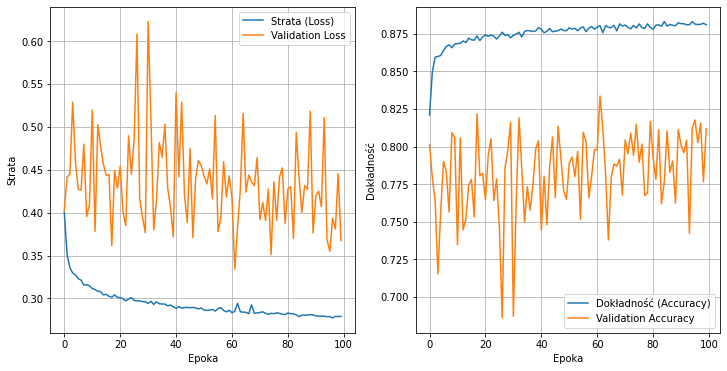

90/90 [==============================] - 0s 779us/step - loss: 0.3187 - accuracy: 0.8710
nodes 16, droput 0, lr 0.005, batch size 64, 


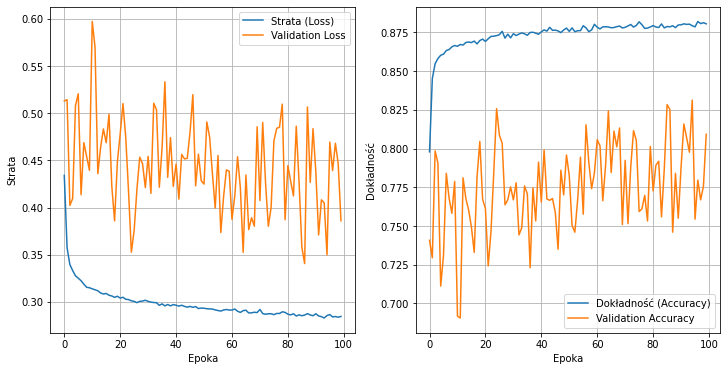

90/90 [==============================] - 0s 864us/step - loss: 0.3203 - accuracy: 0.8763
nodes 16, droput 0, lr 0.005, batch size 128, 


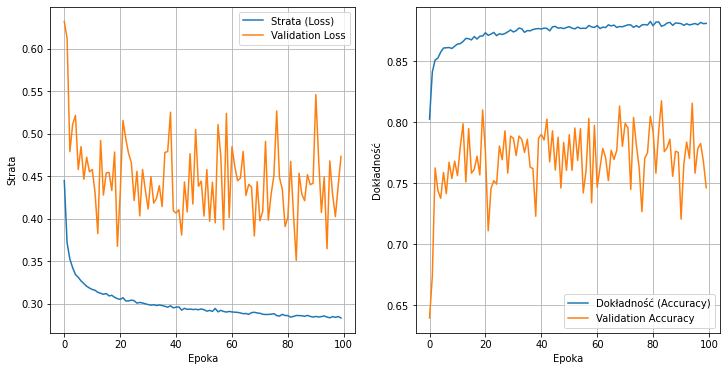

90/90 [==============================] - 0s 890us/step - loss: 0.3166 - accuracy: 0.8724
nodes 16, droput 0, lr 0.001, batch size 32, 


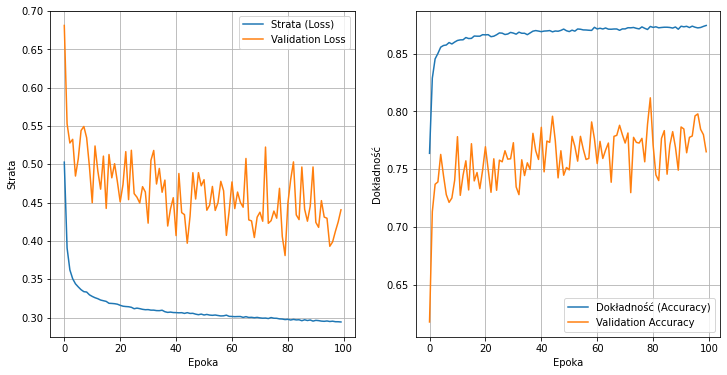

90/90 [==============================] - 0s 902us/step - loss: 0.3081 - accuracy: 0.8773
nodes 16, droput 0, lr 0.001, batch size 64, 


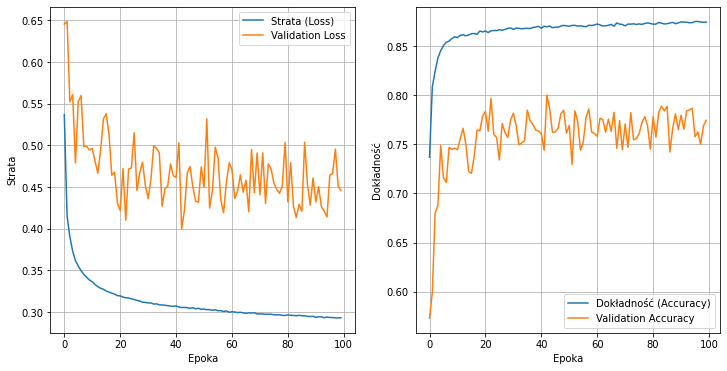

90/90 [==============================] - 0s 977us/step - loss: 0.3038 - accuracy: 0.8784
nodes 16, droput 0, lr 0.001, batch size 128, 


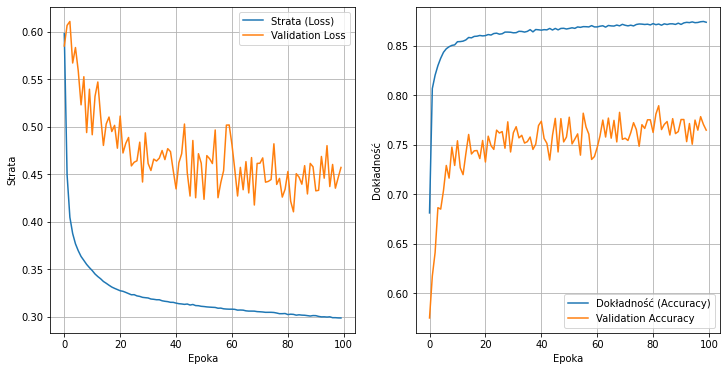

90/90 [==============================] - 0s 915us/step - loss: 0.3000 - accuracy: 0.8773
nodes 16, droput 0, lr 0.01, batch size 32, 


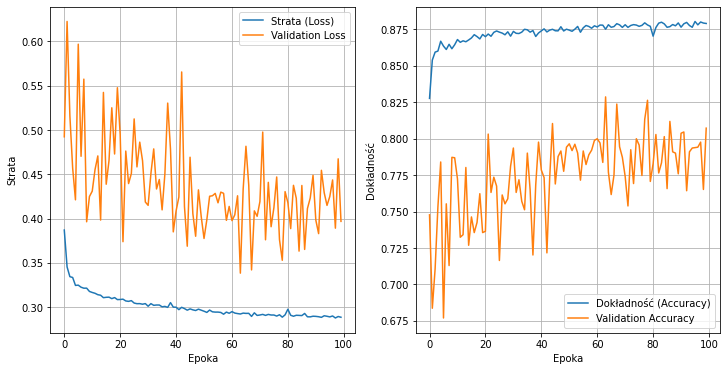

90/90 [==============================] - 0s 829us/step - loss: 0.3350 - accuracy: 0.8742
nodes 16, droput 0, lr 0.01, batch size 64, 


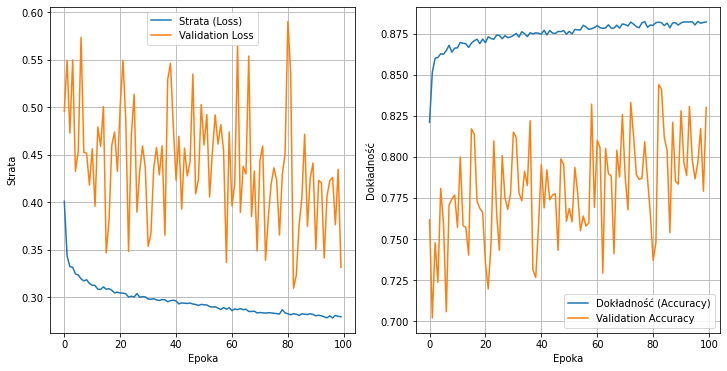

90/90 [==============================] - 0s 899us/step - loss: 0.3294 - accuracy: 0.8710
nodes 16, droput 0, lr 0.01, batch size 128, 


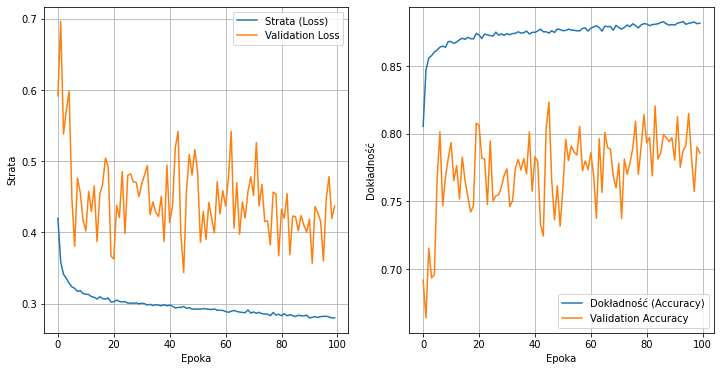

90/90 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8801
nodes 16, droput 0.2, lr 0.005, batch size 32, 


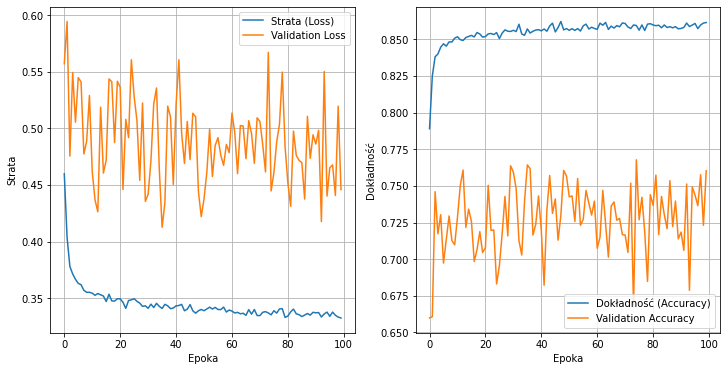

90/90 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8738
nodes 16, droput 0.2, lr 0.005, batch size 64, 


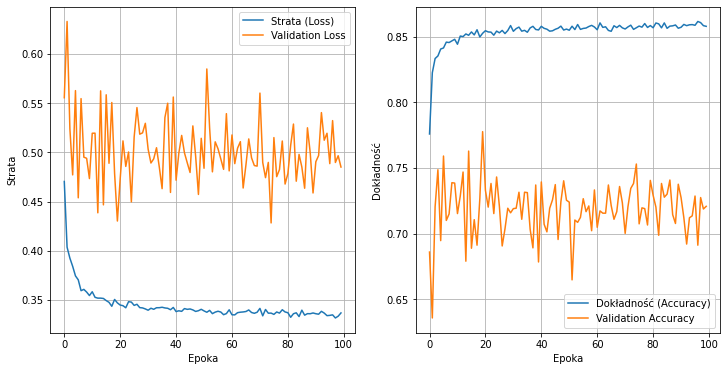

90/90 [==============================] - 0s 998us/step - loss: 0.3122 - accuracy: 0.8689
nodes 16, droput 0.2, lr 0.005, batch size 128, 


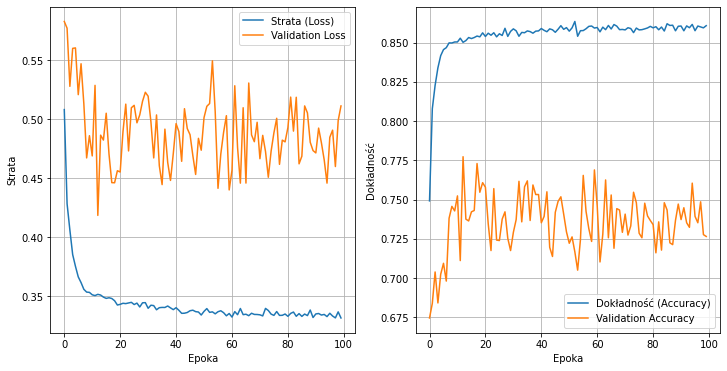

90/90 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8721
nodes 16, droput 0.2, lr 0.001, batch size 32, 


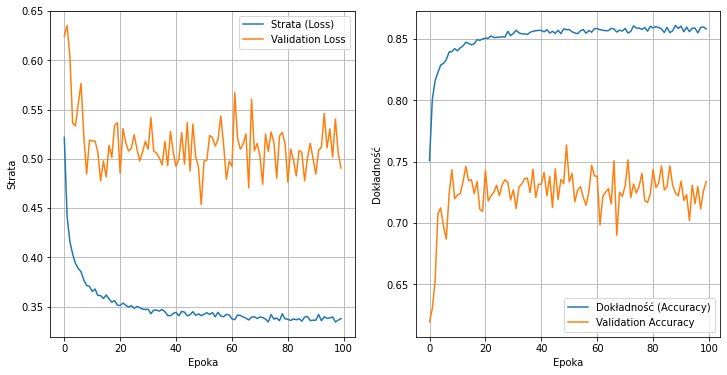

90/90 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8693
nodes 16, droput 0.2, lr 0.001, batch size 64, 


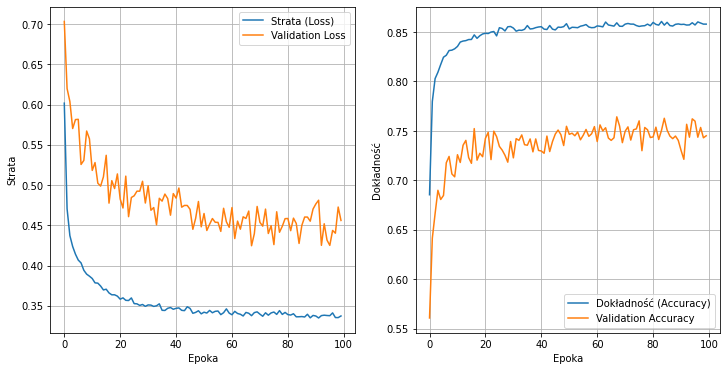

90/90 [==============================] - 0s 898us/step - loss: 0.3103 - accuracy: 0.8745
nodes 16, droput 0.2, lr 0.001, batch size 128, 


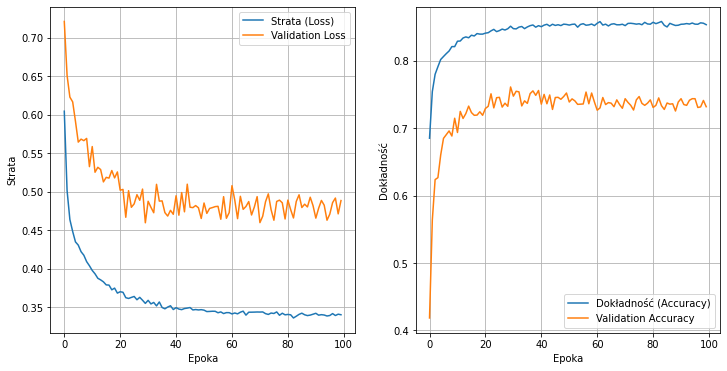

90/90 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8717
nodes 16, droput 0.2, lr 0.01, batch size 32, 


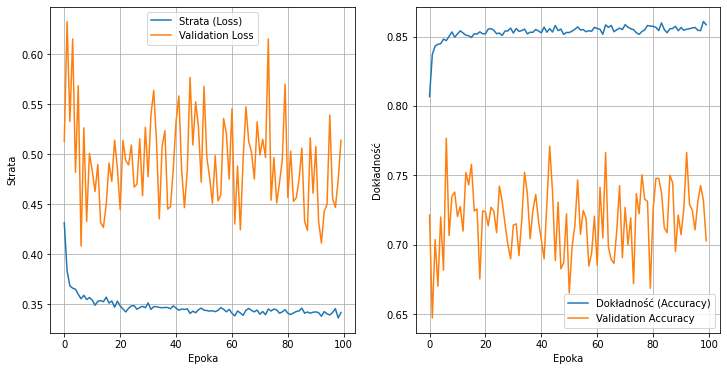

90/90 [==============================] - 0s 779us/step - loss: 0.3207 - accuracy: 0.8682
nodes 16, droput 0.2, lr 0.01, batch size 64, 


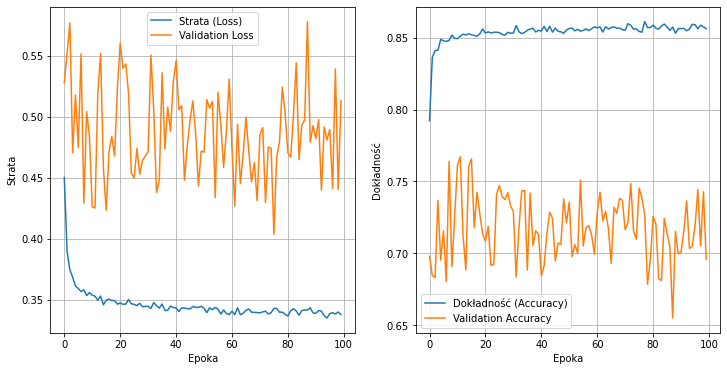

90/90 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8675
nodes 16, droput 0.2, lr 0.01, batch size 128, 


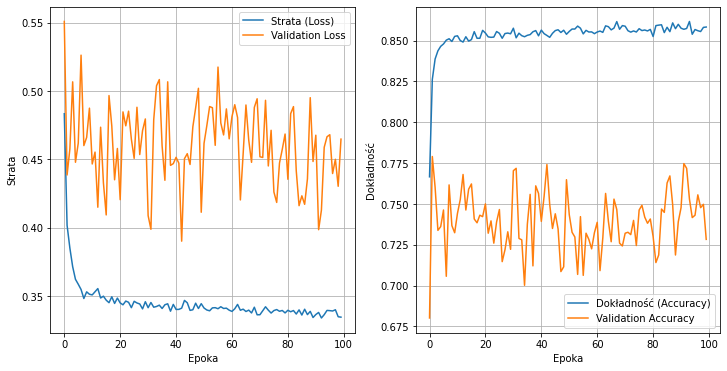

90/90 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8731
nodes 32, droput 0, lr 0.005, batch size 32, 


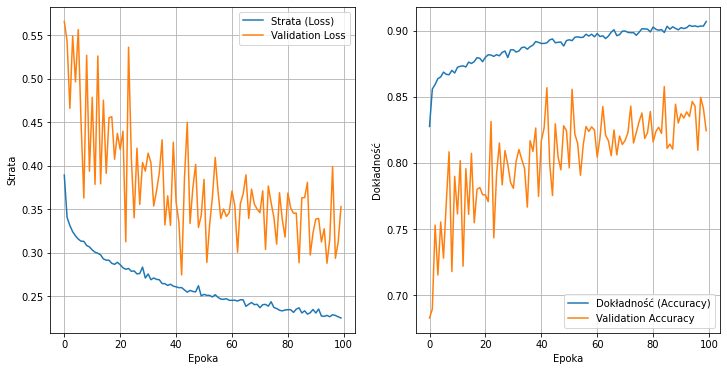

90/90 [==============================] - 0s 998us/step - loss: 0.3780 - accuracy: 0.8724
nodes 32, droput 0, lr 0.005, batch size 64, 


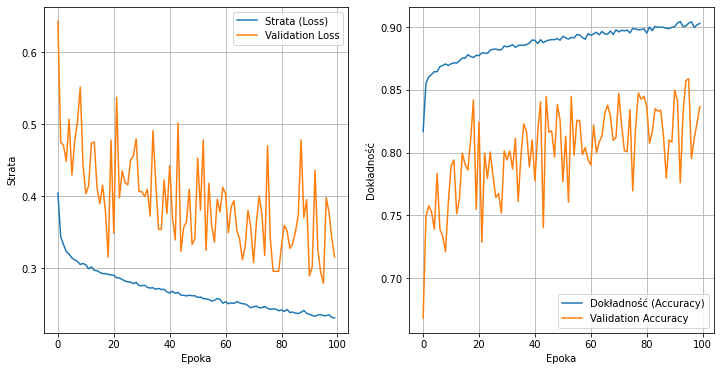

90/90 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8696
nodes 32, droput 0, lr 0.005, batch size 128, 


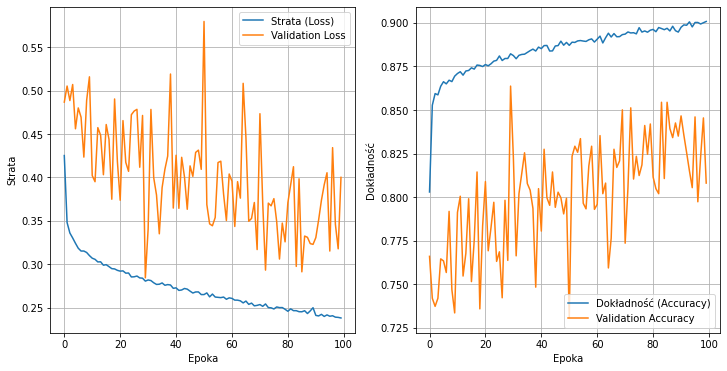

90/90 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8815
nodes 32, droput 0, lr 0.001, batch size 32, 


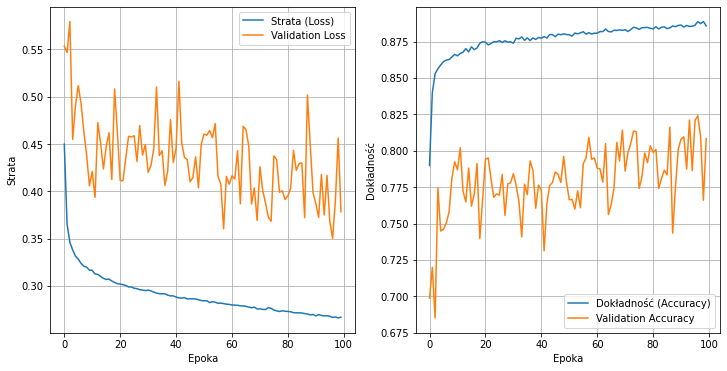

90/90 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8742
nodes 32, droput 0, lr 0.001, batch size 64, 


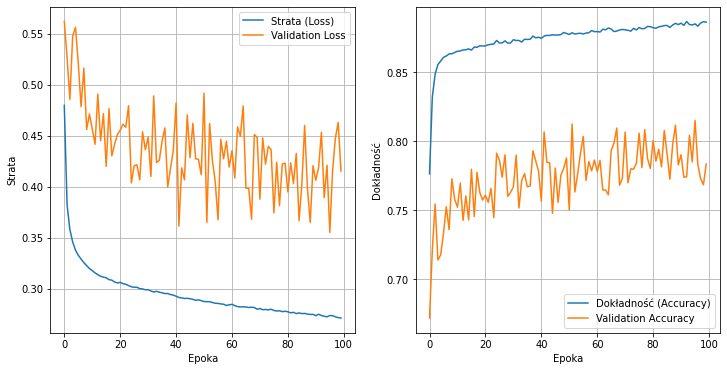

90/90 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8787
nodes 32, droput 0, lr 0.001, batch size 128, 


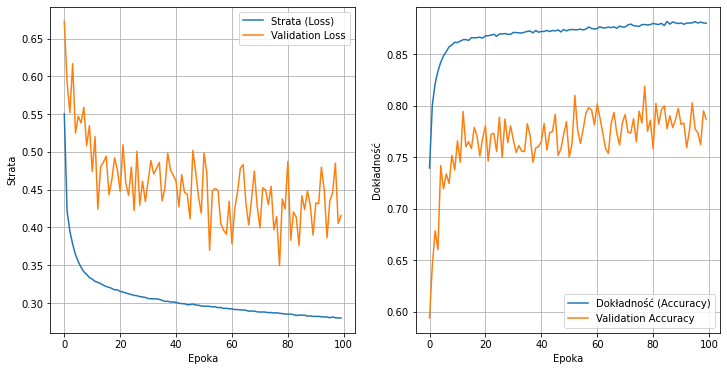

90/90 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8738
nodes 32, droput 0, lr 0.01, batch size 32, 


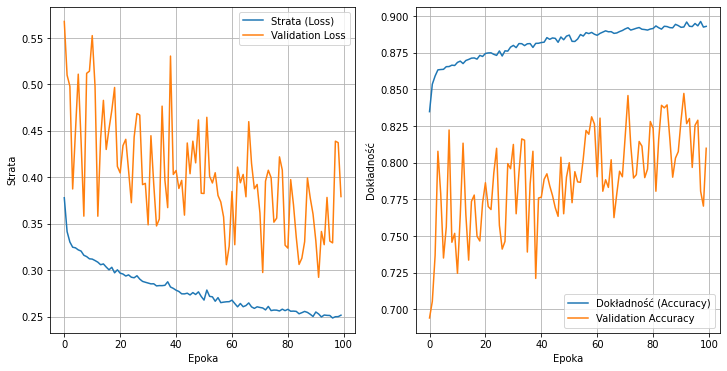

90/90 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8773
nodes 32, droput 0, lr 0.01, batch size 64, 


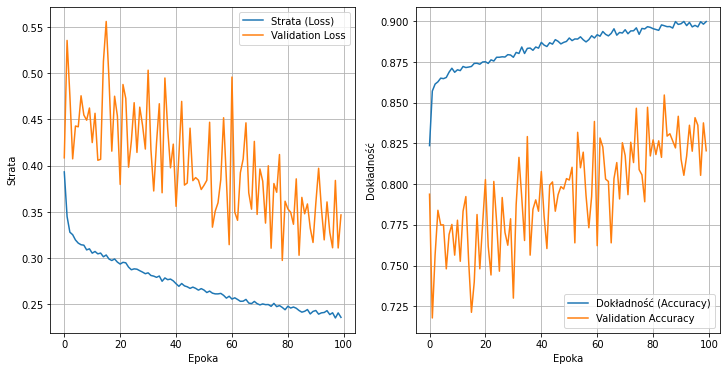

90/90 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8728
nodes 32, droput 0, lr 0.01, batch size 128, 


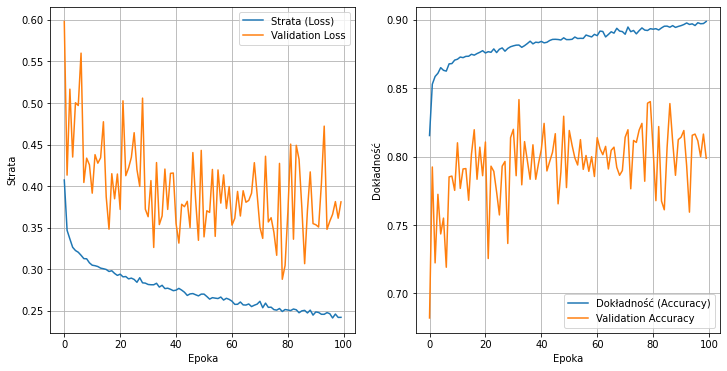

90/90 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8672
nodes 32, droput 0.2, lr 0.005, batch size 32, 


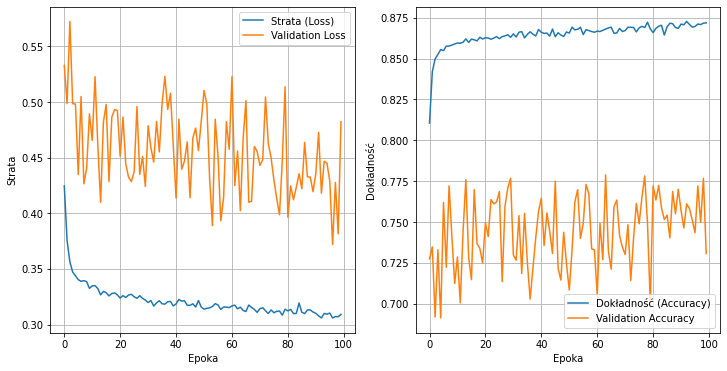

90/90 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8721
nodes 32, droput 0.2, lr 0.005, batch size 64, 


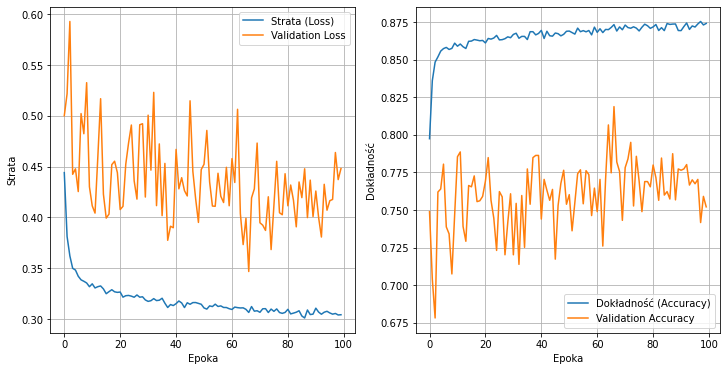

90/90 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.8794
nodes 32, droput 0.2, lr 0.005, batch size 128, 


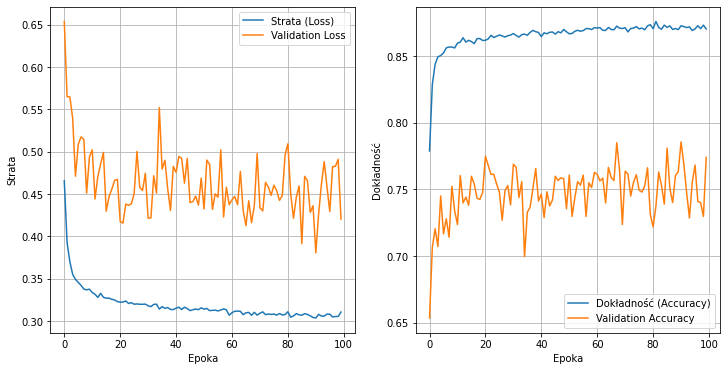

90/90 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8749
nodes 32, droput 0.2, lr 0.001, batch size 32, 


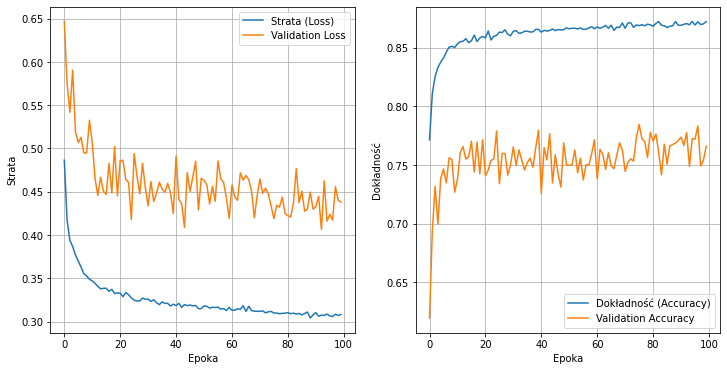

90/90 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8787
nodes 32, droput 0.2, lr 0.001, batch size 64, 


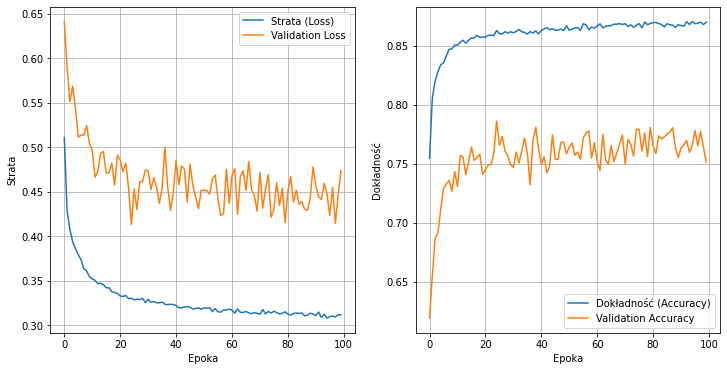

90/90 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.8777
nodes 32, droput 0.2, lr 0.001, batch size 128, 


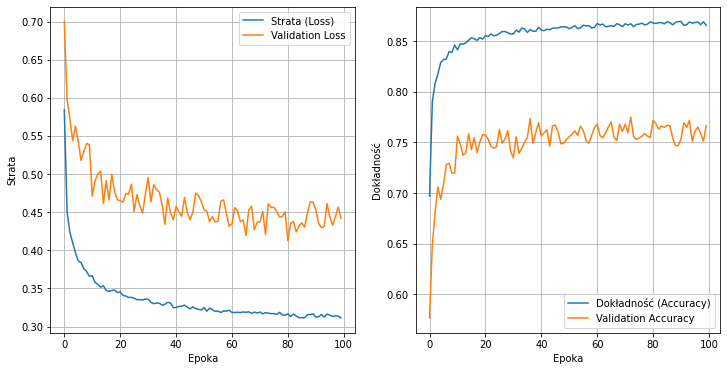

90/90 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8794
nodes 32, droput 0.2, lr 0.01, batch size 32, 


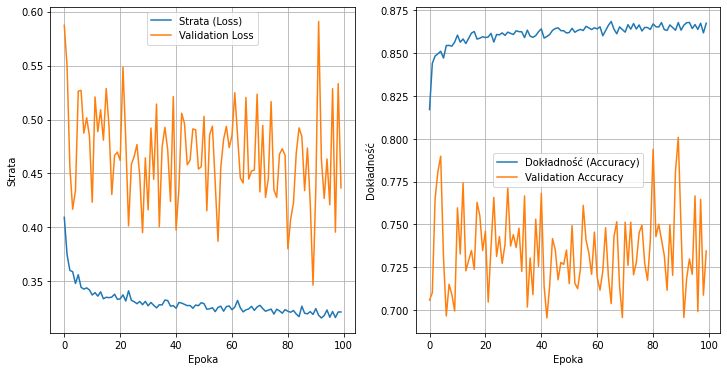

90/90 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8731
nodes 32, droput 0.2, lr 0.01, batch size 64, 


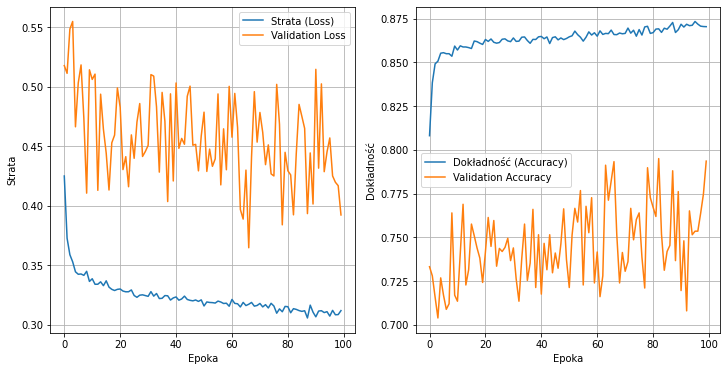

90/90 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8812
nodes 32, droput 0.2, lr 0.01, batch size 128, 


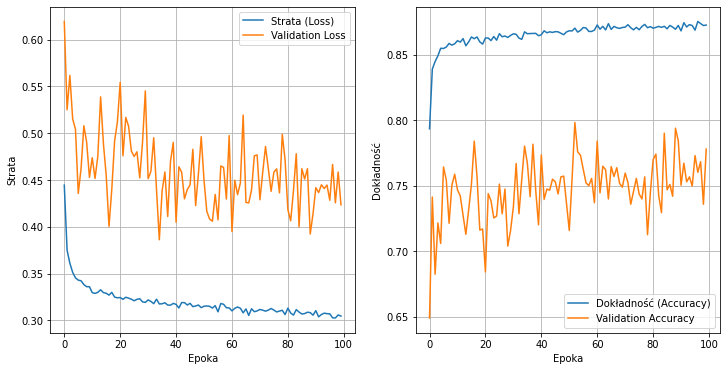

90/90 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8794
nodes 64, droput 0, lr 0.005, batch size 32, 


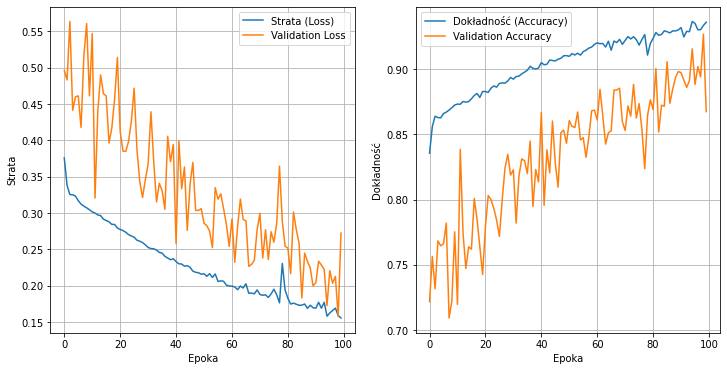

90/90 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.8672
nodes 64, droput 0, lr 0.005, batch size 64, 


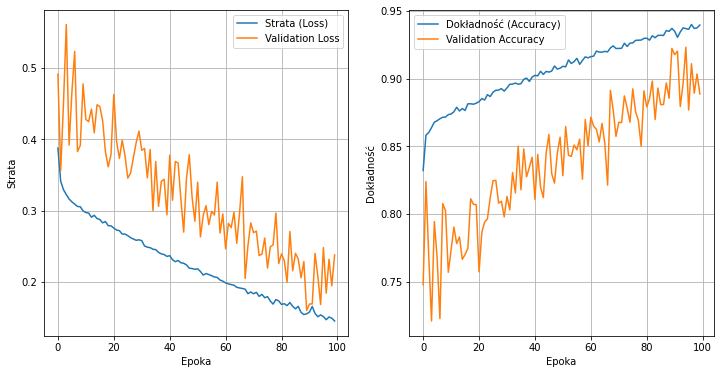

90/90 [==============================] - 0s 973us/step - loss: 0.5212 - accuracy: 0.8661
nodes 64, droput 0, lr 0.005, batch size 128, 


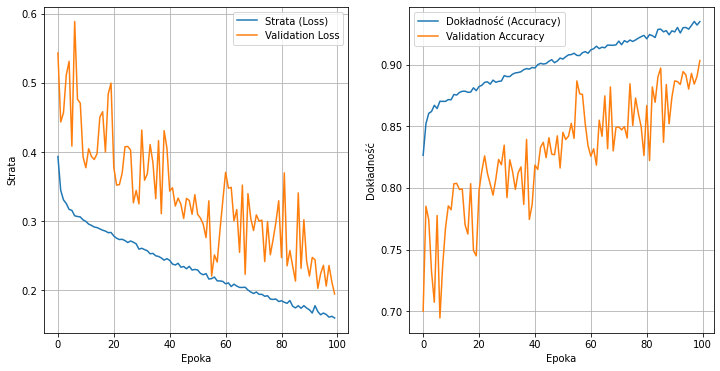

90/90 [==============================] - 0s 969us/step - loss: 0.5450 - accuracy: 0.8542
nodes 64, droput 0, lr 0.001, batch size 32, 


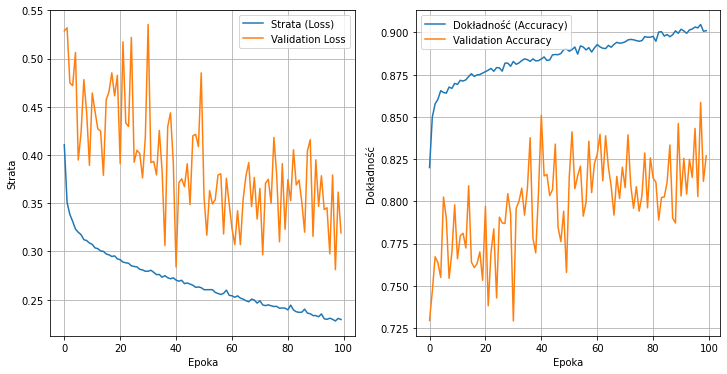

90/90 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8738
nodes 64, droput 0, lr 0.001, batch size 64, 


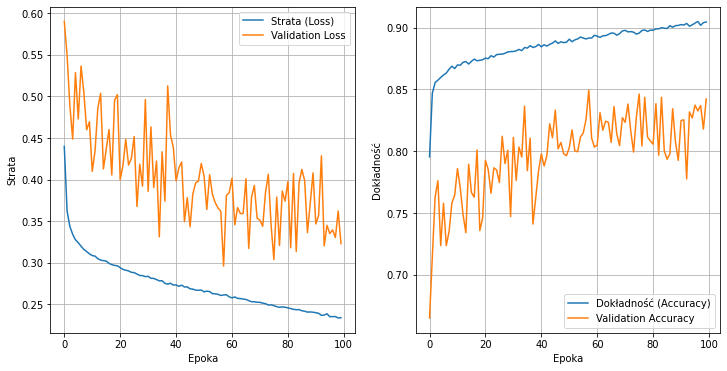

90/90 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8721
nodes 64, droput 0, lr 0.001, batch size 128, 


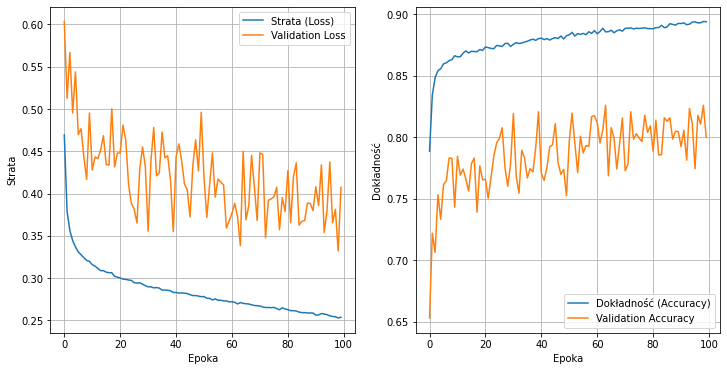

90/90 [==============================] - 0s 997us/step - loss: 0.3087 - accuracy: 0.8721
nodes 64, droput 0, lr 0.01, batch size 32, 


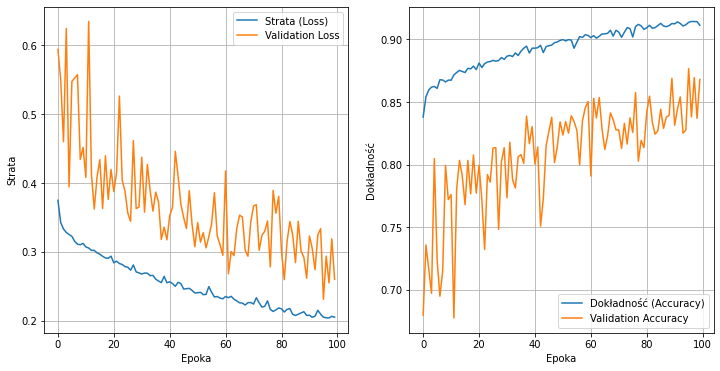

90/90 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.8587
nodes 64, droput 0, lr 0.01, batch size 64, 


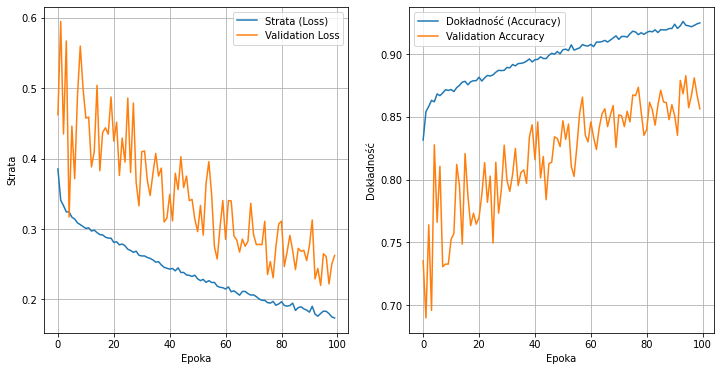

90/90 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.8584
nodes 64, droput 0, lr 0.01, batch size 128, 


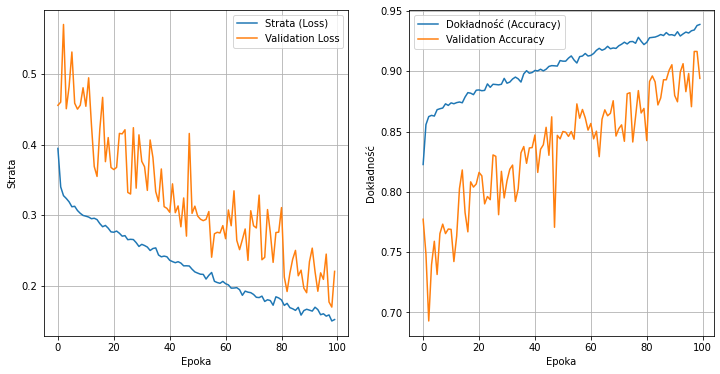

90/90 [==============================] - 0s 973us/step - loss: 0.6410 - accuracy: 0.8500
nodes 64, droput 0.2, lr 0.005, batch size 32, 


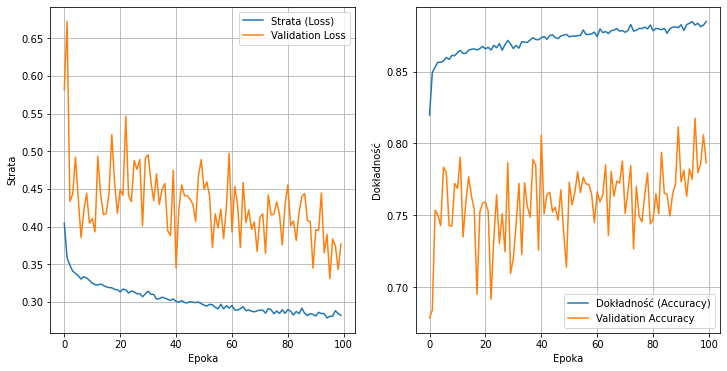

90/90 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8812
nodes 64, droput 0.2, lr 0.005, batch size 64, 


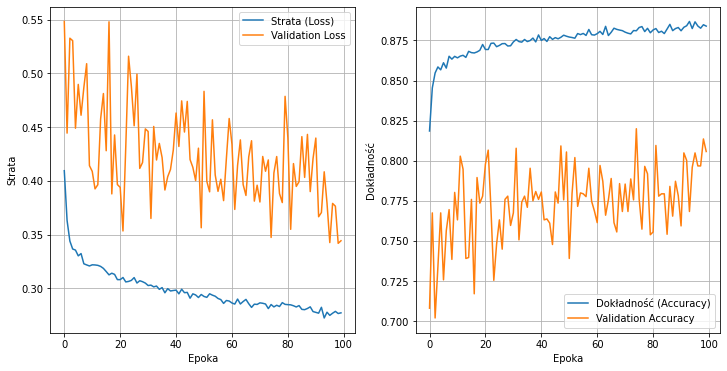

90/90 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8840
nodes 64, droput 0.2, lr 0.005, batch size 128, 


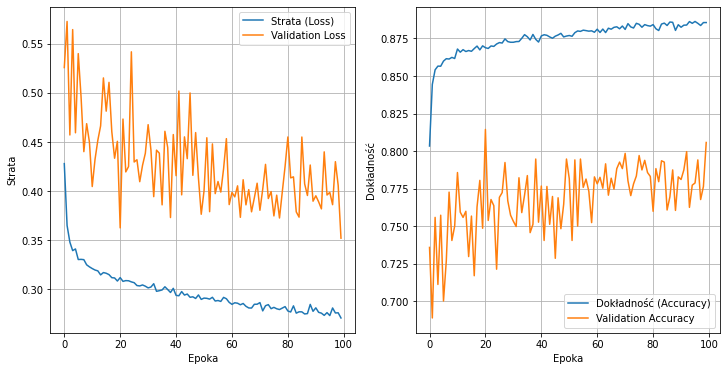

90/90 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8808
nodes 64, droput 0.2, lr 0.001, batch size 32, 


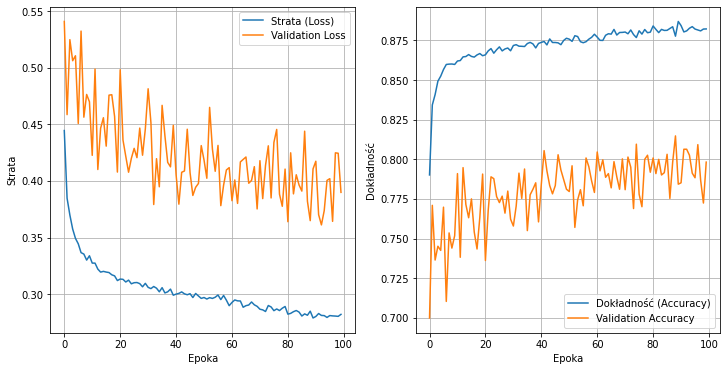

90/90 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.8801
nodes 64, droput 0.2, lr 0.001, batch size 64, 


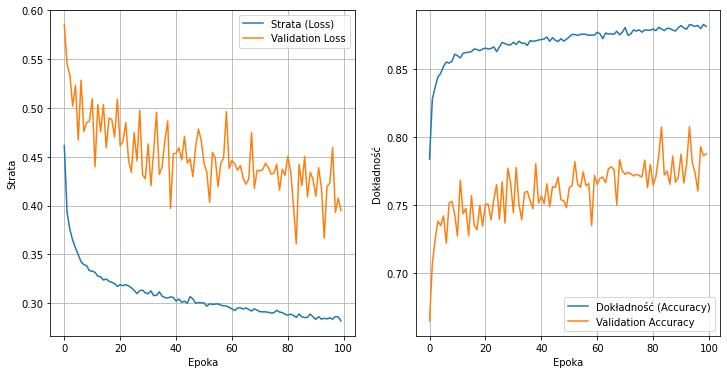

90/90 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8805
nodes 64, droput 0.2, lr 0.001, batch size 128, 


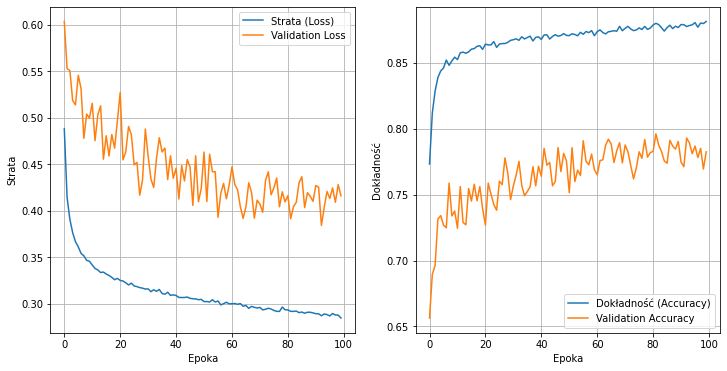

90/90 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8812
nodes 64, droput 0.2, lr 0.01, batch size 32, 


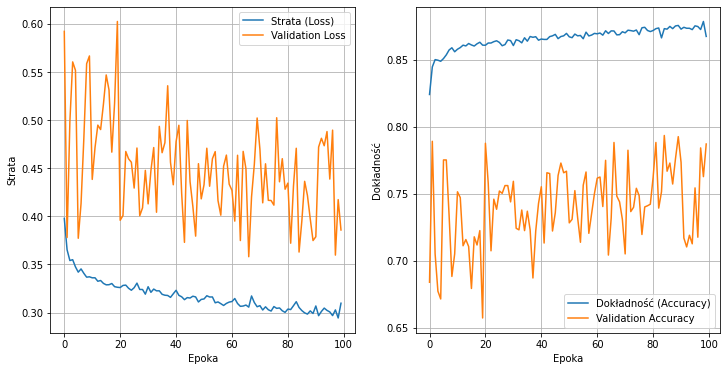

90/90 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8787
nodes 64, droput 0.2, lr 0.01, batch size 64, 


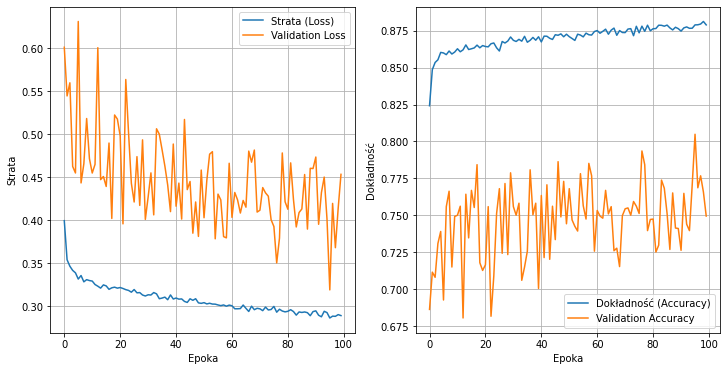

90/90 [==============================] - 0s 968us/step - loss: 0.3137 - accuracy: 0.8770
nodes 64, droput 0.2, lr 0.01, batch size 128, 


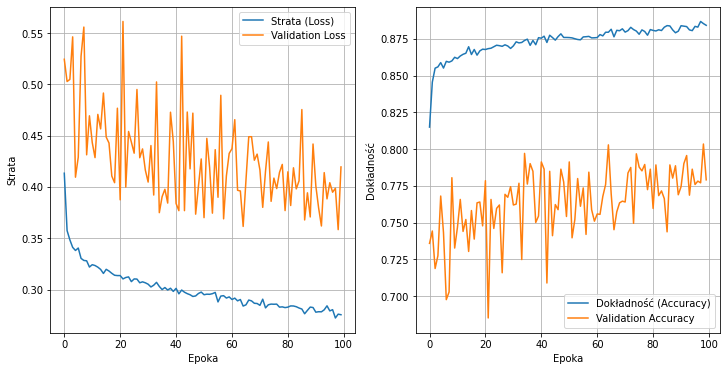

90/90 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8794


In [46]:
epochs=100
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.005, 0.001, 0.01]:
            for batch_size in [32, 64, 128]:
                print(f"nodes {num_nodes}, droput {dropout_prob}, lr {lr}, batch size {batch_size}, ")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot(history)
                evaluation = model.evaluate(x_valid, y_valid)
                val_loss = evaluation[0]  
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [50]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, 1)
y_pred

90/90 [==============================] - 0s 658us/step


array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

<IPython.core.display.Javascript object>